In [1]:
# To display full output in Notebook, instead of only the last result
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
#Please make sure Jupyter Notebook environment is running a Python 3 kernel 
import IPython
assert IPython.version_info[0] >= 3, "Your version of IPython is too old, please update it."
%autosave 120
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt #plotting graphs 
import seaborn as sns # used for plot interactive graph.
# statistical analysis

Autosaving every 120 seconds


## TOC:
* [January](#jan)
* [February](#feb)
* [March](#mar)
* [First Quarter](#fqa)

* [April](#apr)
* [May](#may)
* [June](#jun)
* [Second Quarter](#sqa)

* [July](#jul)
* [August](#aug)
* [September](#sep)
* [Third Quarter](#tqa)

In [3]:
df_inputs = pd.read_csv('fscData/fscDataInputsCleaned.csv')
df_agg = pd.read_csv('fscData/fscDataAggCleaned.csv')
df_fin = pd.read_csv('fscData/fscDataFinCleaned.csv')
df_mech = pd.read_csv('fscData/fscDataMechCleaned.csv')
df_ind = pd.read_csv('fscData/fscDataIndivCleaned.csv')

In [4]:
df_inputs.head()
df_agg.head()
df_fin.head()
df_mech.head()
df_ind.head()

,County,Month,Week,fscName,inputName,Category,Type,companyInvolved,unit,Quantity,Value,Commision Earned
0,Tharaka Nithi,1,2,Magdalene Kiarie,Profen,Crop protection,Pest and desease control,Agrichem Africa Limited,Mls,100,600,0
1,Tharaka Nithi,1,2,Magdalene Kiarie,Booster,Crop Nutrition,Foliar,Agrosolutions Ltd,Mls,750,950,0
2,Meru,1,2,Solomon Muthee,Apical root cuttings,Seeds,Seeds,Apical Root Cuttings,Pieces,100,1000,0
3,Tharaka Nithi,1,2,Magdalene Kiarie,Herbistar,Crop protection,Herbicide,Gov PL,Mls,200,2200,0
4,Tharaka Nithi,1,2,Magdalene Kiarie,Escort,Crop protection,Pest and desease control,Greenlife,Mls,600,3850,0


,County,Month,Week,fscName,crop,kgAgg,kgSold,Sold MT,buyerName,unitPrice,Value,Commission Earned,Number of Male farmers who sold,Number of Female farmers who sold,Total
0,Nakuru,8,1,MIKE TESOT,Potatoes,11250,11250,11.25,Joel Tum,21.0,236250,7500,2,0,2
1,Nakuru,8,1,MIKE TESOT,Potatoes,25500,25500,25.50,Joel Tum,21.0,535500,"17,000",3,2,5
2,Nakuru,8,1,ALEX MACHARIA,Potatoes,37500,37500,37.50,David Murosi,21.0,787500,25000,4,1,5
3,Nakuru,8,1,ALEX MACHARIA,Potatoes,22500,22500,22.50,JOSEPH WAMBUGU,20.0,450000,"15,000",1,2,3
4,Nakuru,8,1,ALEX MACHARIA,Potatoes,15000,15000,15.00,JOSEPH WAMBUGU,21.0,315000,10000,1,2,3


,County,Month,Week,fscName,finGroup,newLoans,newLoanValue,farmersRepaid,Commision Earned
0,Meru,1,4,Isabella Paul,Sunculture,4,625000,19,18430
1,Nakuru,2,3,Collins Rotich,Vision Fund,16,"73,600",16,0
2,Kakamega,2,4,Benjamin Wanguba,1 Acre Fund,11,54564,11,0
3,Meru,2,4,Mark Mwendia,Credit Factory,4,46000,4,440
4,Nakuru,2,4,Lily Cherotich,MOKUNS Sacco,20,"100,000",0,0


,County,Month,Week,fscName,serviceProviderName,serviceProvided,type,Acres/ Bags/Samples/Pumps,Value,Commision Earned,Male,Female,Total
0,Busia,1,1,Marlone Awillie,Moses Wejulu,Mechanisation,Ploughing,21.0,58800,2100,3,2,5.0
1,Busia,1,2,Amos Magero,Peter Wanga,Mechanisation,Ploughing,13.0,36400,1300,2,2,4.0
2,Busia,1,2,Florence Nabwire,Michael ochieng,Mechanisation,Ploughing,8.0,22400,800,1,3,4.0
3,Busia,1,2,Elder Mariamu Omurayi,Trix Magoba,Mechanisation,Ploughing,3.0,7500,300,3,0,3.0
4,Busia,1,2,Shadrack Okuku,Trix Magoba,Mechanisation,Ploughing,1.0,2800,100,1,0,1.0


,name,County,input_value,input_comm,mech_value,mech_comm,agg_total,agg_comm,fin_value,fin_comm,grand_total,grand_total_commission
0,Godfrey Mwongora,Meru,"5,405,652","79,100","29,000",0,"88,979,000","371,000","141,000",0,"94,554,652","450,100"
1,Solomon Muthee,Meru,"71,215","6,885",0,0,"59,226,247","2,627,252","395,000","1,000","59,692,462","2,635,137"
2,Abraham Nganga,Nyandarua,"14,337,110","2,298,138","675,500","73,700","23,418,994","1,047,325","300,000",0,"38,731,604","3,419,163"
3,Lily Cherotich,Nakuru,"2,467,250","116,604","30,000","2,400","35,886,300","2,036,750","100,000",0,"38,483,550","2,155,754"
4,Everest Ogembo,Migori,"75,650","2,040",0,0,"29,866,098","72,536",0,0,"29,941,748","74,576"


In [5]:
common = set.intersection(set(df_inputs.fscName), set(df_agg.fscName), set(df_mech.fscName), set(df_fin.fscName))
print(common)

{'ALEX MACHARIA', 'JOHN KOILEKEN'}


In [6]:
#pd.concat([
  #  df1[df1.Col1.isin(common)],
   # df2[df2.Col1.isin(common)],
    #df3[df3.Col1.isin(common)]]).sort_values(by='Col1')

In [6]:
df_fin.sort_values(by=['Commision Earned','Month'])

,County,Month,Week,fscName,finGroup,newLoans,newLoanValue,farmersRepaid,Commision Earned
1,Nakuru,2,3,Collins Rotich,Vision Fund,16,"73,600",16,0
2,Kakamega,2,4,Benjamin Wanguba,1 Acre Fund,11,54564,11,0
4,Nakuru,2,4,Lily Cherotich,MOKUNS Sacco,20,"100,000",0,0
7,Kakamega,3,2,Benjamin Wanguba,OAF,30,236136,30,0
10,Kakamega,3,4,Lawrence Mukabane,CG SACCO,1,150000,1,0
...,...,...,...,...,...,...,...,...,...
3,Meru,2,4,Mark Mwendia,Credit Factory,4,46000,4,440
22,Homabay,4,2,Millicent Wanjare,Elena Agspace (aggregator),1,68600,1,4400
48,Nakuru,9,1,ALEX MACHARIA,Agri wallet,34,"102,000",34,"6,800"
42,Nakuru,6,4,ALEX MACHARIA,Agri wallet,20,"60,000",20,8000


In [8]:
#replace_values = {'-':np.nan}
#df_mech['Commision Earned'] = df_mech['Commision Earned'].replace(replace_values)
#df_mech.sort_values(by=['Commision Earned','Month'])
#df_mech.isnull().sum()
#df_mech = df_mech.dropna()
#df_mech

In [16]:
com_mth = df_fin.sort_values(['Month'], ascending=True)

In [17]:
com_mth.info()
com_mth = com_mth[['Month','Week','fscName', 'Commision Earned']]
com_mth['Commision Earned'] = (com_mth['Commision Earned'].str.split()).apply(lambda x: float(x[0].replace(',', '')))
com_mth.astype({'Commision Earned': 'float64'}).dtypes
com_mth

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66 entries, 0 to 65
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   County            66 non-null     object
 1   Month             66 non-null     int64 
 2   Week              66 non-null     int64 
 3   fscName           66 non-null     object
 4   finGroup          66 non-null     object
 5   newLoans          66 non-null     int64 
 6   newLoanValue      66 non-null     object
 7   farmersRepaid     66 non-null     int64 
 8   Commision Earned  66 non-null     object
dtypes: int64(4), object(5)
memory usage: 5.2+ KB


Month                 int64
Week                  int64
fscName              object
Commision Earned    float64
dtype: object

,Month,Week,fscName,Commision Earned
0,1,4,Isabella Paul,18430.0
1,2,3,Collins Rotich,0.0
2,2,4,Benjamin Wanguba,0.0
3,2,4,Mark Mwendia,440.0
4,2,4,Lily Cherotich,0.0
...,...,...,...,...
64,11,2,TIMOTHY WAMUYU KIRRUTI,0.0
61,11,1,BENSON SANAMWALA,0.0
62,11,1,JUSTUS NAITUTAE,0.0
63,11,1,RUFUS SIRERE YENKO,0.0


In [9]:
com_mth['Week'] = com_mth['Week'].replace({1 :int(1)})
com_mth.astype({'Week': 'int64'}).dtypes

Month                 int64
Week                  int64
fscName              object
Commision Earned    float64
dtype: object

# JANUARY <a class="anchor" id="jan"></a>

In [11]:
import warnings

,Week,fscName,Commision Earned
0,4,Isabella Paul,18430.0


,Week,fscName,Commision Earned


,Week,fscName,Commision Earned


,Week,fscName,Commision Earned


,Week,fscName,Commision Earned


,Week,fscName,Commision Earned


nan

nan

nan

nan

,Week,Average Commission
0,1,NaN
1,2,NaN
2,3,NaN
3,4,NaN
4,5,NaN


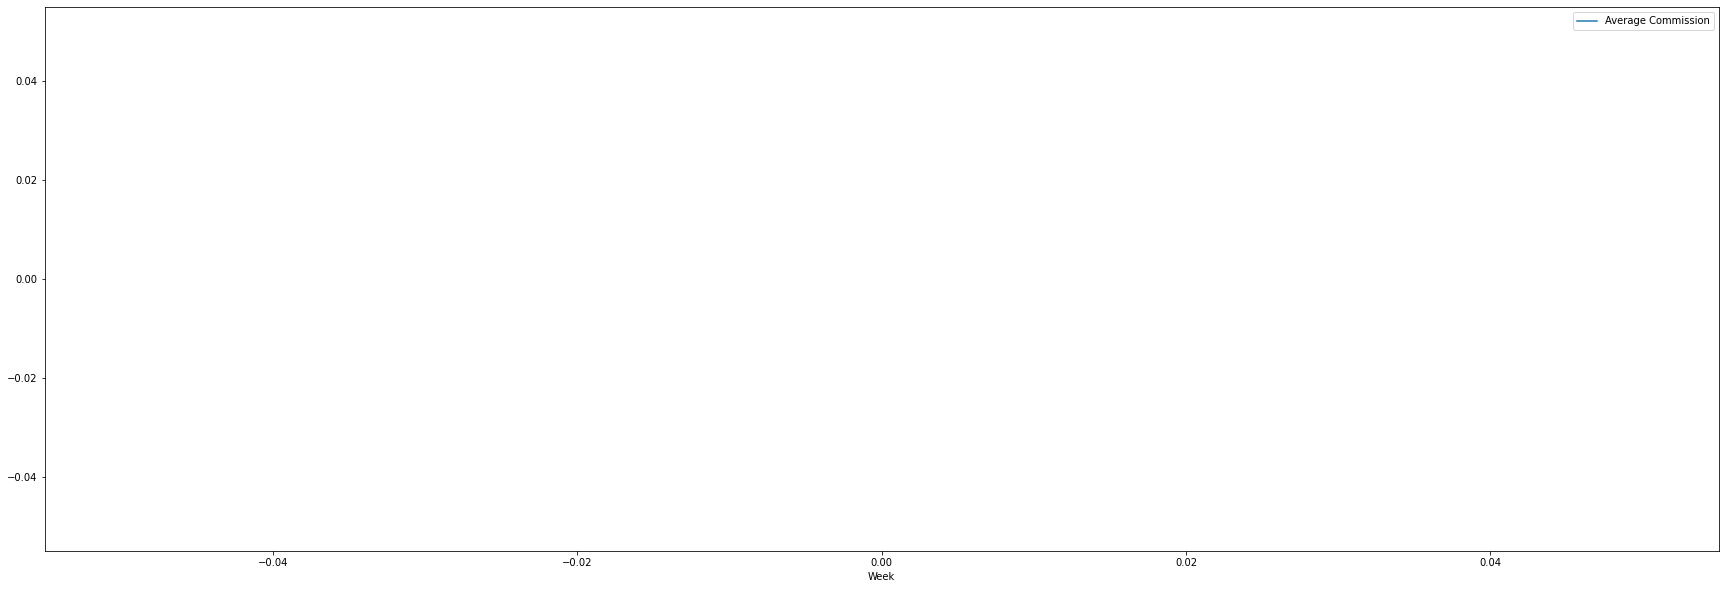

In [12]:
warnings.simplefilter(action='ignore', category=FutureWarning)

#getting the values for specific months
com_jan = com_mth[com_mth['Month']==1]
com_jan = com_jan.sort_values(by='Week')
com_jan = com_jan.drop(columns=['Month'])
com_jan

#getting the values for each week
wk1 = com_jan[com_jan['Week']=='1']
wk1

wk2 = com_jan[com_jan['Week']=='2']
wk2

wk3 = com_jan[com_jan['Week']=='3']
wk3 

wk4 = com_jan[com_jan['Week']=='4']
wk4

wk5 = com_jan[com_jan['Week']=='5']
wk5
#comm_graph = commission_monthly.plot.bar(x='Month', y='Commision Earned', figsize=(30,10))


#getting the average for each week, putting it into a line graph to see a trendline
wk2['Commision Earned'].mean()
wk3['Commision Earned'].mean()
wk4['Commision Earned'].mean()
wk5['Commision Earned'].mean()

d = {'Week': [1, 2, 3, 4, 5], 
     'Average Commission': [ wk1['Commision Earned'].mean(),
                             wk2['Commision Earned'].mean(),
                             wk3['Commision Earned'].mean(),
                             wk4['Commision Earned'].mean(),
                             wk5['Commision Earned'].mean()]}

janAvgComm = pd.DataFrame(data=d)
janAvgComm
janAvg_graph = janAvgComm.plot.line(x='Week', y='Average Commission', figsize=(30,10))

# FEBRUARY <a class="anchor" id="feb"></a>

,Week,fscName,Commision Earned
1,3,Collins Rotich,0.0
3,4,Mark Mwendia,440.0
2,4,Benjamin Wanguba,0.0
4,4,Lily Cherotich,0.0


,Week,fscName,Commision Earned


,Week,fscName,Commision Earned


,Week,fscName,Commision Earned


,Week,fscName,Commision Earned


,Week,Average Commission
0,6,NaN
1,7,NaN
2,8,NaN
3,9,NaN


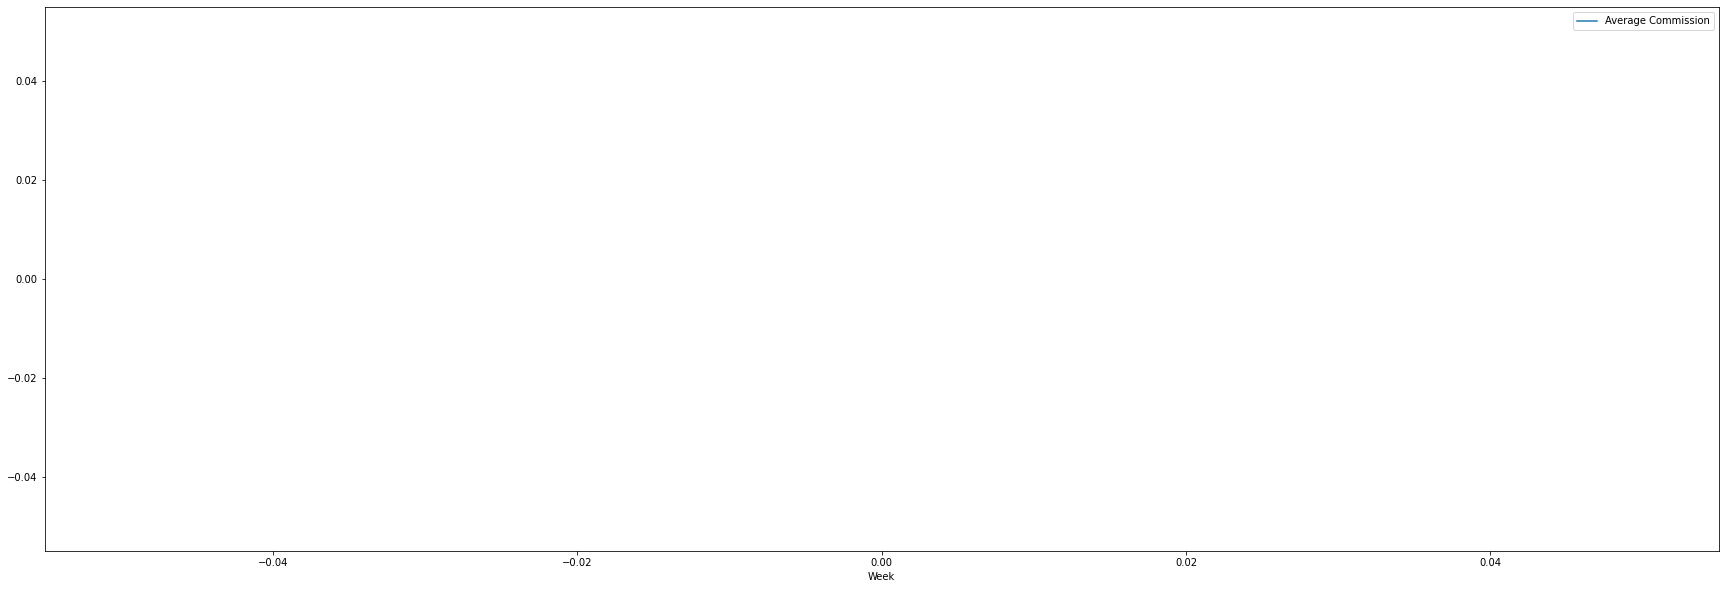

In [13]:
#getting the values for specific months
com_feb = com_mth[com_mth['Month']==2]
com_feb = com_feb.sort_values(by='Week')
com_feb = com_feb.drop(columns=['Month'])
com_feb

#getting the values for each week
wk1 = com_feb[com_feb['Week']=='1']
wk1

wk2 = com_feb[com_feb['Week']=='2']
wk2

wk3 = com_feb[com_feb['Week']=='3']
wk3 

wk4 = com_feb[com_feb['Week']=='4']
wk4


d = {'Week': [6, 7, 8, 9], 
     'Average Commission': [ wk1['Commision Earned'].mean(),
                             wk2['Commision Earned'].mean(),
                             wk3['Commision Earned'].mean(),
                             wk4['Commision Earned'].mean()]}

febAvgComm = pd.DataFrame(data=d)
febAvgComm
febAvg_graph = febAvgComm.plot.line(x='Week', y='Average Commission', figsize=(30,10))

# MARCH <a class="anchor" id="mar"></a>

,Week,fscName,Commision Earned
5,1,Agnes Kathure,2910.0
7,2,Benjamin Wanguba,0.0
6,2,Solomon Muthee,1000.0
8,2,Agnes Kathure,2910.0
9,3,Mark Mwendia,1000.0
12,4,Mark Mwendia,2600.0
10,4,Lawrence Mukabane,0.0
11,4,Judith Akinyi,0.0


,Week,fscName,Commision Earned


,Week,fscName,Commision Earned


,Week,fscName,Commision Earned


,Week,fscName,Commision Earned


,Week,Average Commission
0,10,NaN
1,11,NaN
2,12,NaN
3,13,NaN


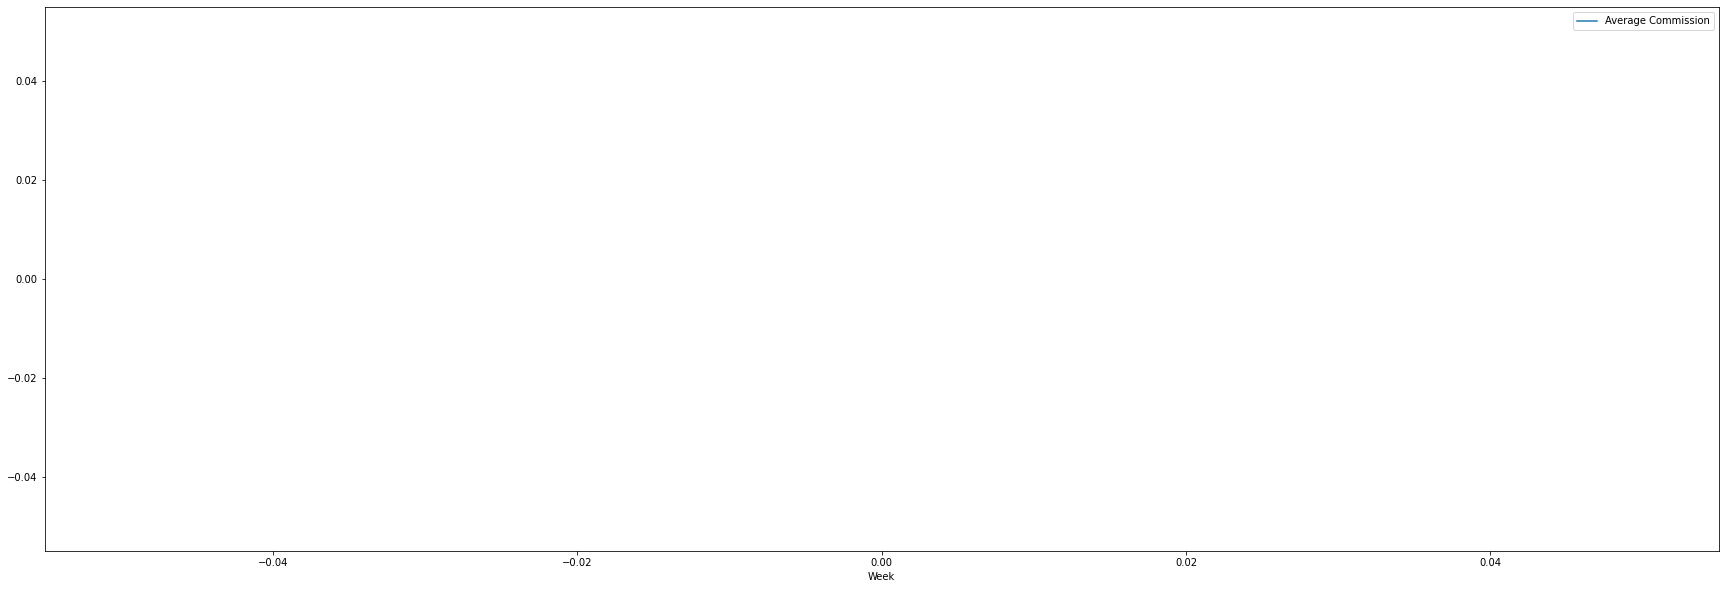

In [18]:
#getting the values for specific months
com_mar = com_mth[com_mth['Month']==3]
com_mar = com_mar.sort_values(by='Week')
com_mar = com_mar.drop(columns=['Month'])
com_mar

#getting the values for each week
wk1 = com_mar[com_mar['Week']=='1']
wk1

wk2 = com_mar[com_mar['Week']=='2']
wk2

wk3 = com_mar[com_mar['Week']=='3']
wk3 

wk4 = com_mar[com_mar['Week']=='4']
wk4

d = {'Week': [10, 11, 12, 13], 
     'Average Commission': [ wk1['Commision Earned'].mean(),
                             wk2['Commision Earned'].mean(),
                             wk3['Commision Earned'].mean(),
                             wk4['Commision Earned'].mean()]}

marAvgComm = pd.DataFrame(data=d)
marAvgComm
marAvg_graph = marAvgComm.plot.line(x='Week', y='Average Commission', figsize=(30,10))

# FIRST QUARTER AVERAGE  <a class="anchor" id="fqa"></a>

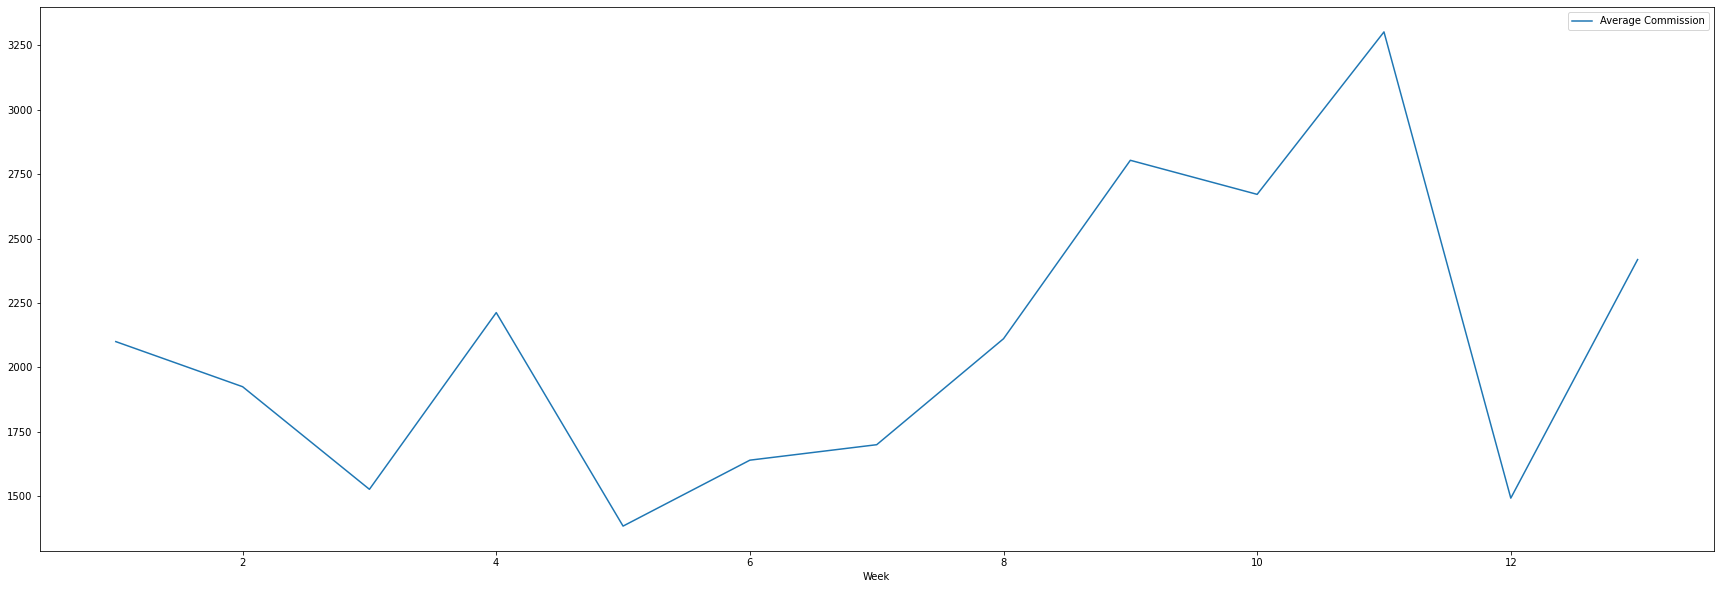

In [15]:
firstQuarter = [janAvgComm, febAvgComm, marAvgComm]

firstQ = pd.concat(firstQuarter)

firstQgraph = firstQ.plot.line(x='Week', y='Average Commission', figsize=(30,10))


# APRIL <a class="anchor" id="apr"></a>

,Week,fscName,Commision Earned
25,4,Ayub Owiti,0.0
34,5,Mark Mwendia,0.0
33,4,John Nyamburi,0.0
31,4,Elphas Owiti,0.0
30,4,David Okombo,0.0
29,4,Kephers Ogola,0.0
28,4,Julius Oker,0.0
27,4,Jacinta Adhaya Ochieng,0.0
26,4,Washington Obiero,0.0
24,3,Gitonga Lawrence,1400.0


,Week,fscName,Commision Earned


,Week,fscName,Commision Earned


,Week,fscName,Commision Earned


,Week,fscName,Commision Earned


,Week,fscName,Commision Earned


,Week,Average Commission
0,14,NaN
1,15,NaN
2,16,NaN
3,17,NaN
4,18,NaN


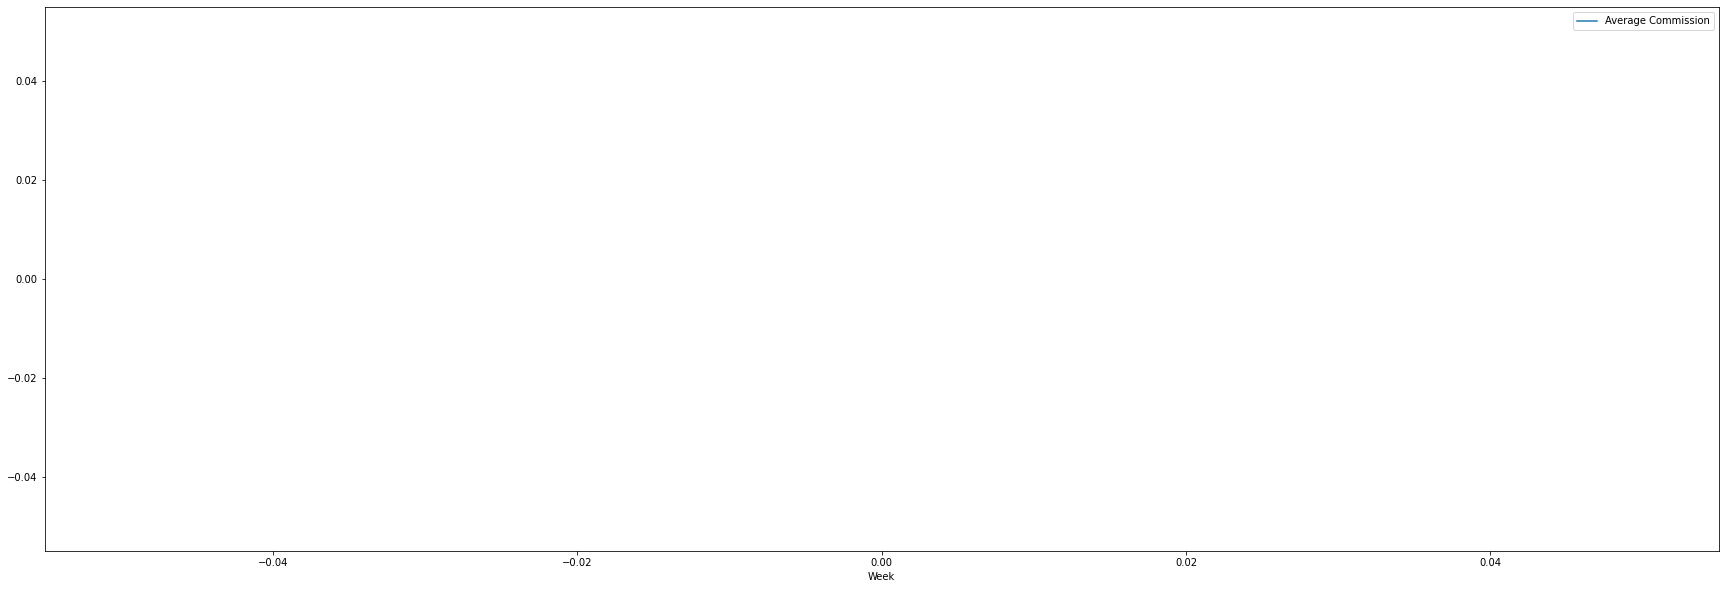

In [19]:
#getting the values for specific months
com_apr = com_mth[com_mth['Month']==4]
com_apr = com_apr.drop(columns=['Month'])
com_apr

#getting the values for each week
wk1 = com_apr[com_apr['Week']=='1']
wk1

wk2 = com_apr[com_apr['Week']=='2']
wk2

wk3 = com_apr[com_apr['Week']=='3']
wk3 

wk4 = com_apr[com_apr['Week']=='4']
wk4

wk5 = com_apr[com_apr['Week']=='5']
wk5

d = {'Week': [14, 15, 16, 17, 18], 
     'Average Commission': [ wk1['Commision Earned'].mean(),
                             wk2['Commision Earned'].mean(),
                             wk3['Commision Earned'].mean(),
                             wk4['Commision Earned'].mean(),
                             wk5['Commision Earned'].mean()]}

aprAvgComm = pd.DataFrame(data=d)
aprAvgComm
aprAvg_graph = aprAvgComm.plot.line(x='Week', y='Average Commission', figsize=(30,10))

# MAY <a class="anchor" id="may"></a>

,Week,fscName,type,Commision Earned,Total
626,1,Andrew Oywa,Rotavation,2000.0,9.0
630,1,Elphas Owiti,Spraying,2000.0,10.0
640,1,Joseph Ebu,Spraying,300.0,0.0
641,1,Benson Njuguna,Ploughing,200.0,1.0
625,1,Andrew Oywa,Rotavation,2000.0,11.0
642,1,Benson Njuguna,Soil Testing,500.0,1.0
635,1,Mathew Mbeka,Ploughing,5000.0,26.0
628,1,Andrew Oywa,Ploughing,3000.0,5.0
643,1,Robert Nyanjwa,sugarcane transport,5600.0,3.0
637,1,Ruth Wandera,Spraying,600.0,1.0


,Week,fscName,type,Commision Earned,Total
626,1,Andrew Oywa,Rotavation,2000.0,9.0
630,1,Elphas Owiti,Spraying,2000.0,10.0
640,1,Joseph Ebu,Spraying,300.0,0.0
641,1,Benson Njuguna,Ploughing,200.0,1.0
625,1,Andrew Oywa,Rotavation,2000.0,11.0
642,1,Benson Njuguna,Soil Testing,500.0,1.0
635,1,Mathew Mbeka,Ploughing,5000.0,26.0
628,1,Andrew Oywa,Ploughing,3000.0,5.0
643,1,Robert Nyanjwa,sugarcane transport,5600.0,3.0
637,1,Ruth Wandera,Spraying,600.0,1.0


,Week,fscName,type,Commision Earned,Total
653,2,Matilda Owira,Spraying,225.0,4.0
657,2,Jane Kisia,rotavation,2000.0,10.0
646,2,Phylis Olendo,Spraying,250.0,3.0
661,2,Nicholas Owiti,Ploughing,2000.0,5.0
650,2,Lavender Achieng,Spraying,200.0,4.0
658,2,Mathew Mbeka,Ploughing,3000.0,15.0
659,2,Mathew Mbeka,rotavation,3000.0,15.0
656,2,Jane Kisia,Ploughing,2000.0,10.0
644,2,Marlone Awillie,Spraying,9000.0,6.0
648,2,Joseph Ebu,Spraying,500.0,2.0


,Week,fscName,type,Commision Earned,Total
670,3,David Onyunde,Spraying,850.0,9.0
662,3,Regina Muthoni,Spraying,785.0,12.0
667,3,Jane Kisia,rotavation,2000.0,10.0
666,3,Jane Kisia,Ploughing,2000.0,10.0
668,3,Willis Omondi,Ploughing,3000.0,15.0
663,3,Collins Rotich,Ploughing,1000.0,2.0
665,3,John Nyamburi,Ploughing,500.0,3.0
671,3,Robert Nyanjwa,sugarcane transport,1680.0,1.0
672,3,Joseph Ebu,Spraying,1000.0,1.0
669,3,Willis Omondi,rotavation,3000.0,15.0


,Week,fscName,type,Commision Earned,Total
680,4,David Onyunde,Spraying,1050.0,17.0
683,4,Enock Okeyo,rotavation,3000.0,15.0
675,4,Alex Macharia,Spraying,2700.0,9.0
673,4,Alex Macharia,Spraying,3900.0,12.0
682,4,Enock Okeyo,Ploughing,3000.0,15.0
678,4,Robert Nyanjwa,sugarcane transport,3360.0,1.0
676,4,Alex Macharia,Spraying,3500.0,3.0
679,4,Robert Nyanjwa,sugarcane transport,500.0,1.0
674,4,Noah Rono,Spraying,650.0,2.0
677,4,Alex Macharia,Spraying,2500.0,4.0


,Week,Average Commission
0,19,2573.684211
1,20,2427.500000
2,21,1583.181818
3,22,2287.272727


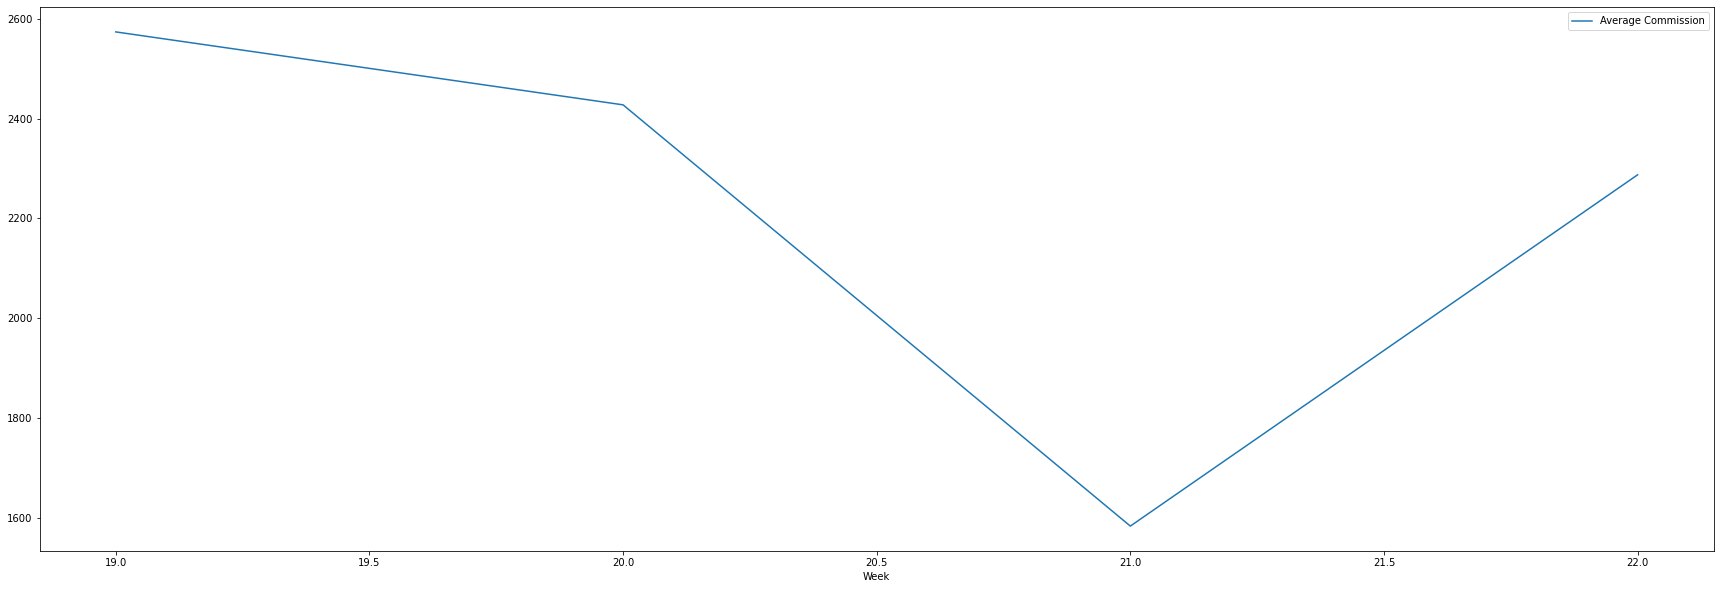

In [17]:
#getting the values for specific months
com_may = com_mth[com_mth['Month']==5]
com_may = com_may.sort_values(by='Week')
com_may = com_may.drop(columns=['Month'])
com_may

#getting the values for each week
wk1 = com_may[com_may['Week']=='1']
wk1

wk2 = com_may[com_may['Week']=='2']
wk2

wk3 = com_may[com_may['Week']=='3']
wk3 

wk4 = com_may[com_may['Week']=='4']
wk4

d = {'Week': [19, 20, 21, 22], 
     'Average Commission': [ wk1['Commision Earned'].mean(),
                             wk2['Commision Earned'].mean(),
                             wk3['Commision Earned'].mean(),
                             wk4['Commision Earned'].mean()]}

mayAvgComm = pd.DataFrame(data=d)
mayAvgComm
mayAvg_graph = mayAvgComm.plot.line(x='Week', y='Average Commission', figsize=(30,10))

# JUNE <a class="anchor" id="jun"></a>

,Week,fscName,type,Commision Earned,Total
689,1,Samson Opiyo,Ploughing,1500.0,7.500
690,1,ENOCK OKEYO,Ploughing,1000.0,5.000
686,1,Samson Opiyo,Ploughing,750.0,3.750
691,1,ENOCK OKEYO,rotavation,1000.0,5.000
684,1,John Nyamburi,Ploughing,700.0,3.500
687,1,Samson Opiyo,Spraying,2500.0,2.500
685,1,John Nyamburi,Ploughing,1200.0,6.000
692,1,Francis Opere,Ploughing,500.0,2.500
688,1,Samson Opiyo,Spraying,3000.0,3.000
693,1,Benard Ogako,Ploughing,3000.0,5.000


,Week,fscName,type,Commision Earned,Total
689,1,Samson Opiyo,Ploughing,1500.0,7.50
690,1,ENOCK OKEYO,Ploughing,1000.0,5.00
686,1,Samson Opiyo,Ploughing,750.0,3.75
691,1,ENOCK OKEYO,rotavation,1000.0,5.00
684,1,John Nyamburi,Ploughing,700.0,3.50
687,1,Samson Opiyo,Spraying,2500.0,2.50
685,1,John Nyamburi,Ploughing,1200.0,6.00
692,1,Francis Opere,Ploughing,500.0,2.50
688,1,Samson Opiyo,Spraying,3000.0,3.00
693,1,Benard Ogako,Ploughing,3000.0,5.00


,Week,fscName,type,Commision Earned,Total
695,2,AMOS MAGERO,Ploughing,1300.0,6.5
696,2,AMOS MAGERO,Ploughing,1300.0,6.5


,Week,fscName,type,Commision Earned,Total
703,3,SAMMY SANG,Spraying,1400.0,7.0
702,3,Samson Mburu,Soil Testing,9000.0,45.0
706,3,JOHN NYAMBURI,rotavation,1300.0,6.5
700,3,David Onyunde,Spraying,150.0,1.5
707,3,WILLIS OMONDI,Ploughing,1000.0,5.0
705,3,JOHN NYAMBURI,Ploughing,1300.0,6.5
709,3,AMOS MAGERO,Planting,1300.0,6.5
704,3,MARK MWENDIA,Threshing,2130.0,35.5
699,3,Peter Wambi,Spraying,100.0,1.0
708,3,WILLIS OMONDI,rotavation,1000.0,5.0


,Week,fscName,type,Commision Earned,Total
719,4,MARK MWENDIA,Threshing,900.0,9.000
715,4,ALEX MACHARIA,Spraying,7300.0,36.500
718,4,Joseph Marangu,Threshing,650.0,13.000
716,4,NOAH RONO,Spraying,1200.0,6.375
713,4,ROBERT NYANJWA,sugarcane transport,20000.0,20.000
711,4,GEOFFREY KUNGU,Ploughing,5000.0,25.000
721,4,SAMUEL NYAPOLA,Spraying,50.0,1.000
714,4,ROBERT NYANJWA,sugarcane transport,4000.0,4.000
717,4,NOAH RONO,Spraying,1400.0,7.000
720,4,EUNICE AKINYI,Ploughing,600.0,1.000


,Week,Average Commission
0,23,1504.545455
1,24,1300.000000
2,25,2848.571429
3,26,3781.818182


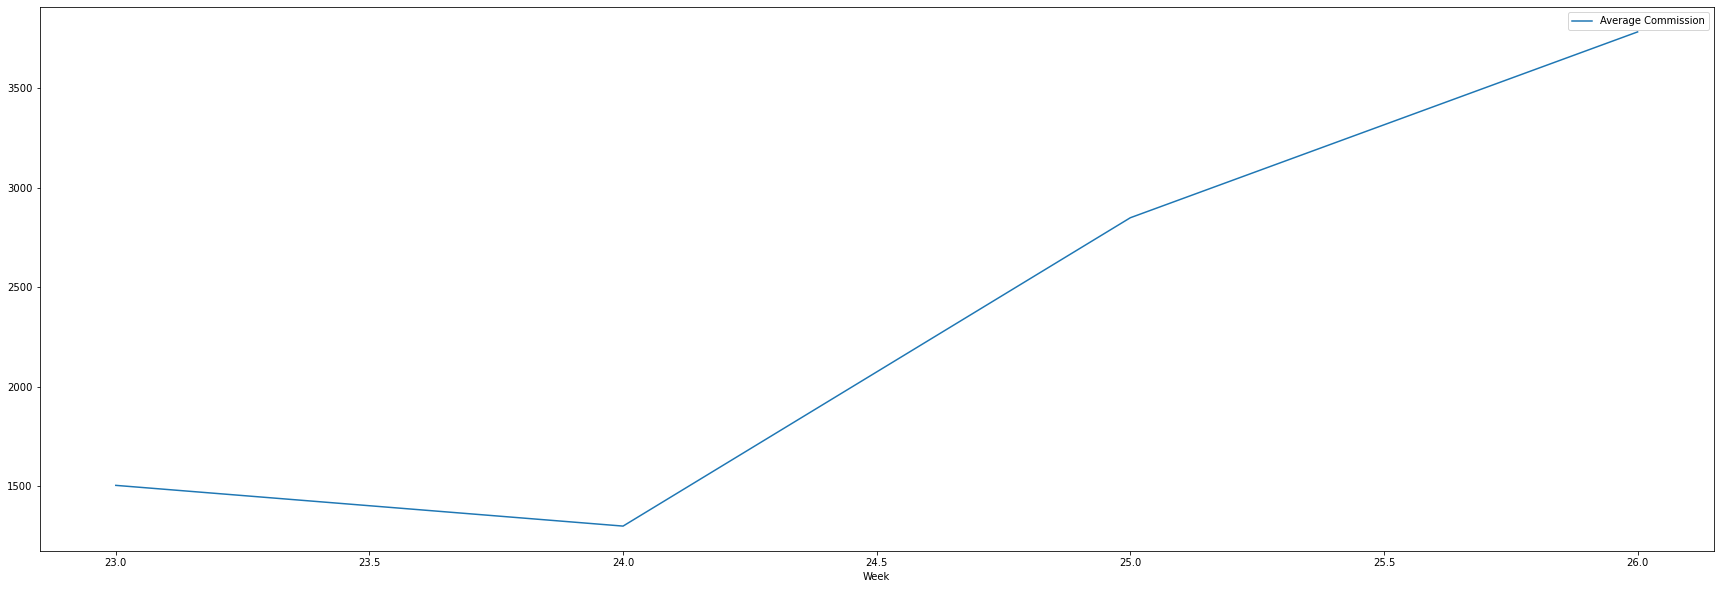

In [18]:
#getting the values for specific months
com_jun = com_mth[com_mth['Month']==6]
com_jun = com_jun.sort_values(by='Week')
com_jun = com_jun.drop(columns=['Month'])
com_jun

#getting the values for each week
wk1 = com_jun[com_jun['Week']=='1']
wk1

wk2 = com_jun[com_jun['Week']=='2']
wk2

wk3 = com_jun[com_jun['Week']=='3']
wk3 

wk4 = com_jun[com_jun['Week']=='4']
wk4


d = {'Week': [23, 24, 25, 26], 
     'Average Commission': [ wk1['Commision Earned'].mean(),
                             wk2['Commision Earned'].mean(),
                             wk3['Commision Earned'].mean(),
                             wk4['Commision Earned'].mean()]}

junAvgComm = pd.DataFrame(data=d)
junAvgComm
junAvg_graph = junAvgComm.plot.line(x='Week', y='Average Commission', figsize=(30,10))

# SECOND QUARTER AVERAGE<a class="anchor" id="sqa"></a>

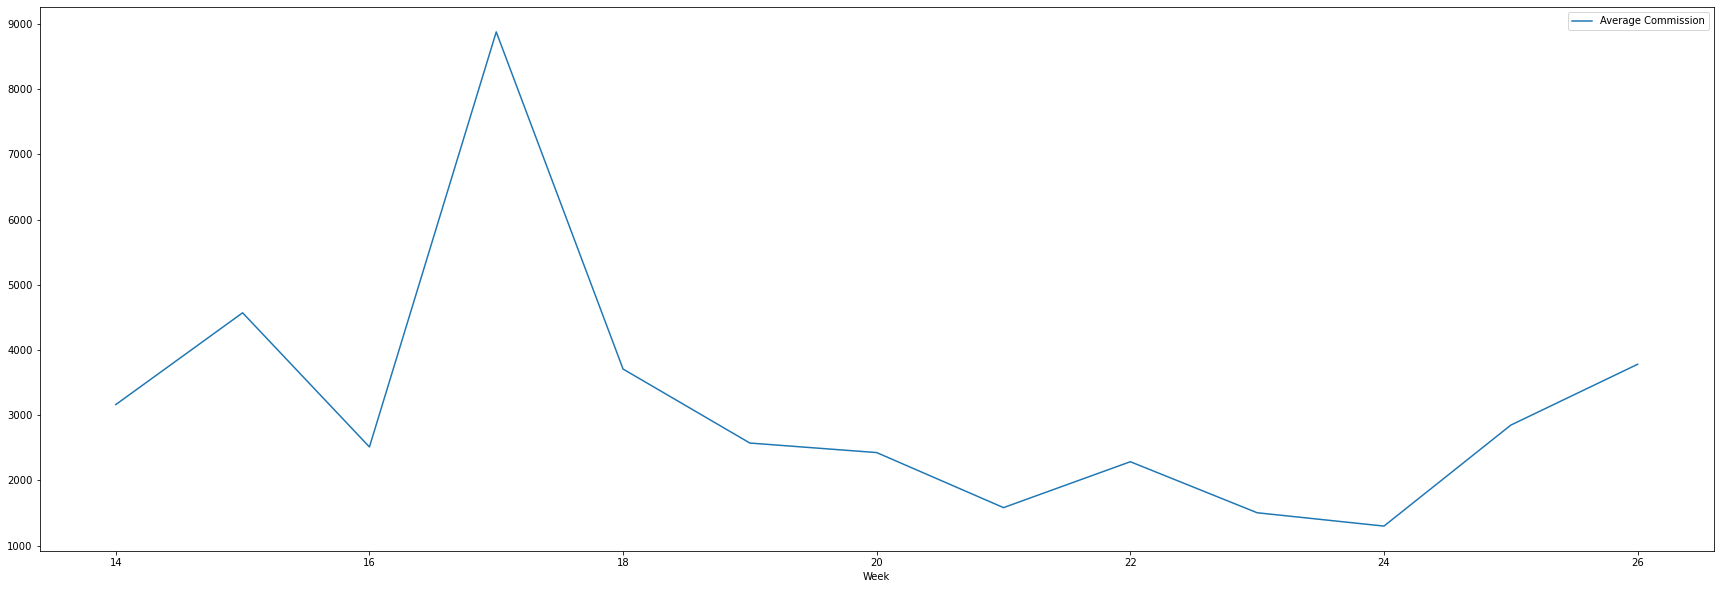

In [19]:
secondQuarter = [aprAvgComm, mayAvgComm, junAvgComm]

secondQ = pd.concat(secondQuarter)

secondQgraph = secondQ.plot.line(x='Week', y='Average Commission', figsize=(30,10))

In [20]:
# JULY <a class="anchor" id="jul"></a>

,Week,fscName,type,Commision Earned,Total
735,1,MILLICENT ATIENO,Harrowing,900.0,5.0
726,1,ALEX MACHARIA,Spraying,1700.0,3.0
737,1,SAMUEL NYAPOLA,Spraying,100.0,2.0
723,1,ALEX MACHARIA,Spraying,1000.0,4.0
733,1,MARTIN MAKOKHA,Ploughing,1000.0,4.0
734,1,MILLICENT ATIENO,Ploughing,1000.0,11.0
728,1,ALEX MACHARIA,Spraying,2000.0,8.0
725,1,ALEX MACHARIA,Spraying,2000.0,6.0
731,1,GEOFFREY KUNGU,rotavation,2000.0,10.0
730,1,GEOFFREY KUNGU,ploughing,2000.0,10.0


,Week,fscName,type,Commision Earned,Total
735,1,MILLICENT ATIENO,Harrowing,900.0,5.0
726,1,ALEX MACHARIA,Spraying,1700.0,3.0
737,1,SAMUEL NYAPOLA,Spraying,100.0,2.0
723,1,ALEX MACHARIA,Spraying,1000.0,4.0
733,1,MARTIN MAKOKHA,Ploughing,1000.0,4.0
734,1,MILLICENT ATIENO,Ploughing,1000.0,11.0
728,1,ALEX MACHARIA,Spraying,2000.0,8.0
725,1,ALEX MACHARIA,Spraying,2000.0,6.0
731,1,GEOFFREY KUNGU,rotavation,2000.0,10.0
730,1,GEOFFREY KUNGU,ploughing,2000.0,10.0


,Week,fscName,type,Commision Earned,Total
751,2,MARLONE AWILLIE,Spraying,7500.0,2.0
740,2,FRANCIS OPERE,Spraying,100.0,1.0
738,2,JAMES ONYANGO,Ploughing,700.0,3.0
745,2,Robert Opar,Harrowing,1200.0,2.0
744,2,Robert Opar,Ploughing,1600.0,4.0
743,2,ROBERT NYANJWA,Ploughing,3000.0,3.0
748,2,ROBERT NYANJWA,Sugarcane Transport,42000.0,41.0
739,2,JUDITH OCHUODHO,Ploughing,400.0,2.0
746,2,FRANCIS OPERE,Sugarcane Transport,22400.0,37.0
742,2,ROBERT NYANJWA,sugarcane transport,36600.0,5.0


,Week,fscName,type,Commision Earned,Total


,Week,fscName,type,Commision Earned,Total
752,4,GEOFFREY KUNGU,Spraying,5000.0,2.0
754,4,KEPHERS OGOLA,Spraying,5600.0,2.0
753,4,PETER TANYASIS,Spraying,6600.0,2.0


,Week,fscName,type,Commision Earned,Total
756,5,JOHN KOILEKEN,Spraying,12000.0,2.0
755,5,PETER TANYASIS,Spraying,10800.0,2.0
757,5,ALEX MACHARIA,Spraying,2500.0,2.0


,Week,Average Commission
0,27,2625.625000
1,28,10607.142857
2,29,NaN
3,30,5733.333333
4,31,8433.333333


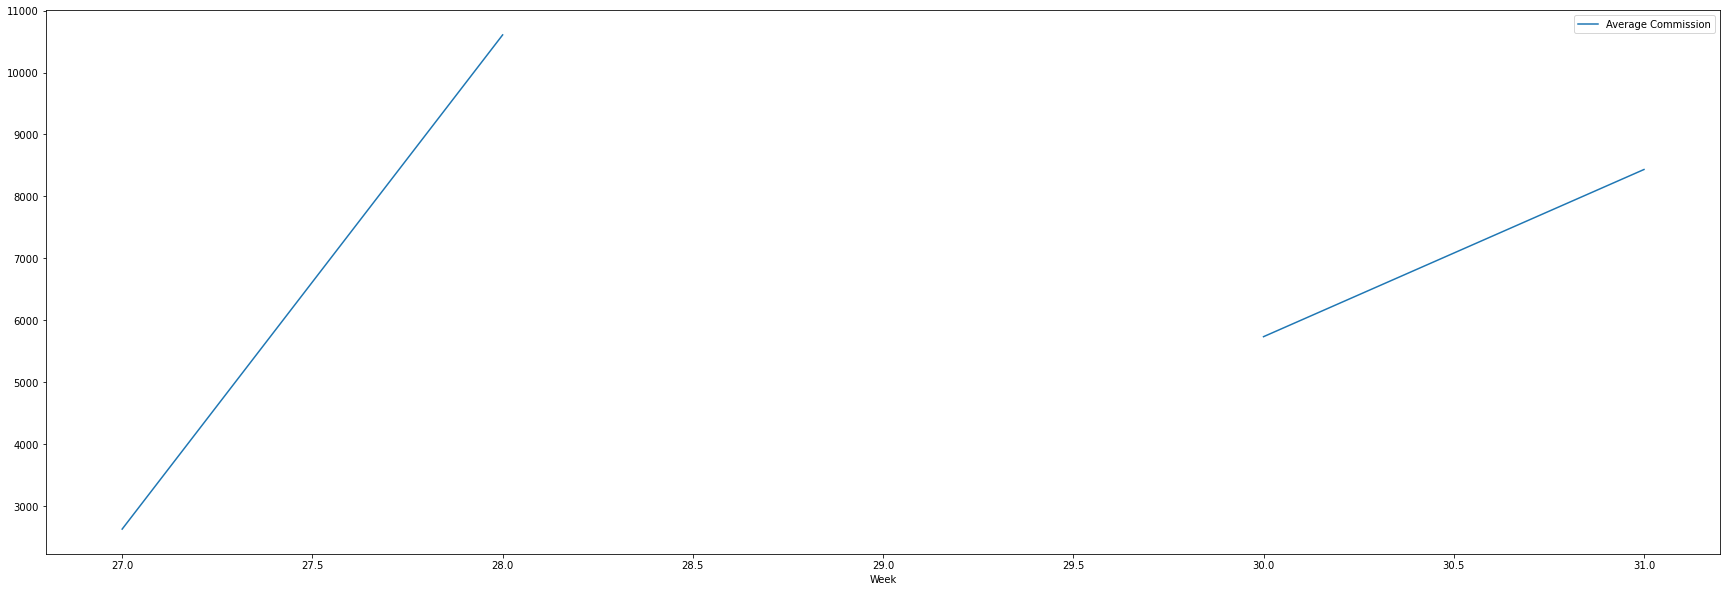

In [21]:
#getting the values for specific months
com_jul = com_mth[com_mth['Month']==7]
com_jul = com_jul.sort_values(by='Week')
com_jul = com_jul.drop(columns=['Month'])
com_jul

#getting the values for each week
wk1 = com_jul[com_jul['Week']=='1']
wk1

wk2 = com_jul[com_jul['Week']=='2']
wk2

wk3 = com_jul[com_jul['Week']=='3']
wk3 

wk4 = com_jul[com_jul['Week']=='4']
wk4

wk5 = com_jul[com_jul['Week']=='5']
wk5

d = {'Week': [27, 28, 29, 30, 31], 
     'Average Commission': [ wk1['Commision Earned'].mean(),
                             wk2['Commision Earned'].mean(),
                             wk3['Commision Earned'].mean(),
                             wk4['Commision Earned'].mean(),
                             wk5['Commision Earned'].mean()]}

julAvgComm = pd.DataFrame(data=d)
julAvgComm
julAvg_graph = julAvgComm.plot.line(x='Week', y='Average Commission', figsize=(30,10))

# AUGUST  <a class="anchor" id="aug"></a>

,Week,fscName,type,Commision Earned,Total
761,1,KEPHERS OGOLA,Spraying,6500.0,2.0
759,1,ALEX MACHARIA,Spraying,5400.0,2.0
762,1,ELDER MARIAMU OMURAYI,Spraying,500.0,2.0
760,1,SAMUEL NYAPOLA,Spraying,400.0,2.0
758,1,LEANAH MWANGI,Spraying,2000.0,2.0
763,1,PHYLIS OLENDO,Spraying,0.0,2.0
764,1,AMOS MAGERO,Spraying,0.0,2.0
766,3,David Onyunde,Spraying,650.0,2.0
765,3,SAMUEL NYAPOLA,Spraying,500.0,2.0
767,3,JAMES ONYANGO,Spraying,400.0,2.0


,Week,fscName,type,Commision Earned,Total
761,1,KEPHERS OGOLA,Spraying,6500.0,2.0
759,1,ALEX MACHARIA,Spraying,5400.0,2.0
762,1,ELDER MARIAMU OMURAYI,Spraying,500.0,2.0
760,1,SAMUEL NYAPOLA,Spraying,400.0,2.0
758,1,LEANAH MWANGI,Spraying,2000.0,2.0
763,1,PHYLIS OLENDO,Spraying,0.0,2.0
764,1,AMOS MAGERO,Spraying,0.0,2.0


,Week,fscName,type,Commision Earned,Total


,Week,fscName,type,Commision Earned,Total
766,3,David Onyunde,Spraying,650.0,2.0
765,3,SAMUEL NYAPOLA,Spraying,500.0,2.0
767,3,JAMES ONYANGO,Spraying,400.0,2.0
770,3,LEANAH MWANGI,Spraying,3500.0,2.0
768,3,SYLVESTER OWINO,Spraying,350.0,2.0
771,3,JOSEPH NYALANDO,Spraying,3200.0,2.0
769,3,SAMSON OPIYO,Spraying,1200.0,2.0


,Week,fscName,type,Commision Earned,Total
773,4,SAMUEL NYAPOLA,Spraying,600.0,2.0
772,4,SYLVESTER OWINO,Spraying,450.0,2.0


,Week,Average Commission
0,32,2114.285714
1,33,NaN
2,34,1400.000000
3,35,525.000000


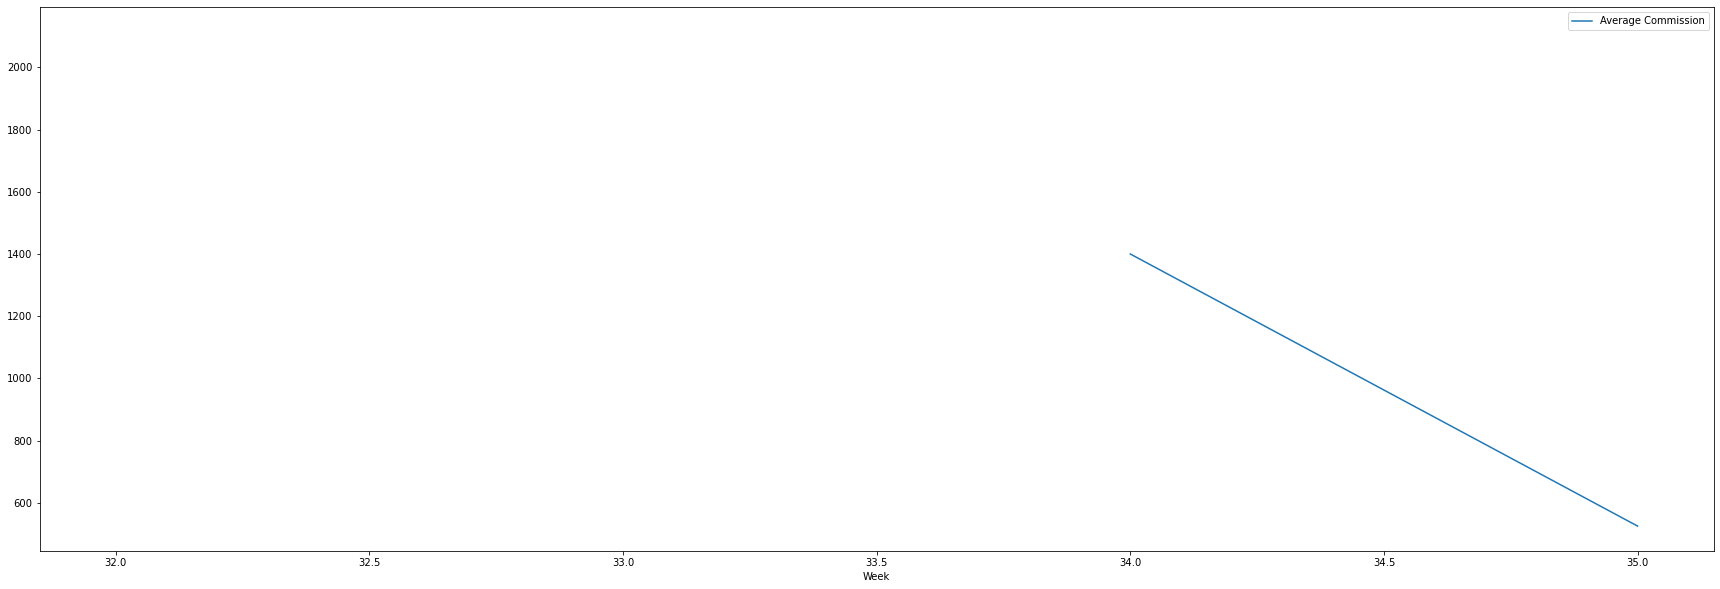

In [22]:
#getting the values for specific months
com_aug = com_mth[com_mth['Month']==8]
com_aug = com_aug.sort_values(by='Week')
com_aug = com_aug.drop(columns=['Month'])
com_aug

#getting the values for each week
wk1 = com_aug[com_aug['Week']=='1']
wk1

wk2 = com_aug[com_aug['Week']=='2']
wk2

wk3 = com_aug[com_aug['Week']=='3']
wk3 

wk4 = com_aug[com_aug['Week']=='4']
wk4


d = {'Week': [32, 33, 34, 35], 
     'Average Commission': [ wk1['Commision Earned'].mean(),
                             wk2['Commision Earned'].mean(),
                             wk3['Commision Earned'].mean(),
                             wk4['Commision Earned'].mean()]}

augAvgComm = pd.DataFrame(data=d)
augAvgComm
augAvg_graph = augAvgComm.plot.line(x='Week', y='Average Commission', figsize=(30,10))

# SEPTEMBER <a class="anchor" id="sep"></a>

,Week,fscName,type,Commision Earned,Total
777,1,SYLVESTER OWINO,Spraying,900.0,2.0
775,1,David Onyunde,Spraying,1450.0,2.0
780,1,MARLONE AWILLIE,Spraying,14000.0,2.0
778,1,MARTIN OLOO JUMA,Spraying,1300.0,2.0
781,1,ELDER MARIAMU OMURAYI,Spraying,700.0,2.0
779,1,NOAH OWUOR,Spraying,1100.0,2.0
776,1,SAMUEL NYAPOLA,Spraying,900.0,2.0
774,1,CALEB ODHIAMBO,Spraying,4000.0,2.0
787,2,Matilda Owira,Spraying,880.0,2.0
782,2,Nobert Ogutu,Spraying,74000.0,2.0


,Week,fscName,type,Commision Earned,Total
777,1,SYLVESTER OWINO,Spraying,900.0,2.0
775,1,David Onyunde,Spraying,1450.0,2.0
780,1,MARLONE AWILLIE,Spraying,14000.0,2.0
778,1,MARTIN OLOO JUMA,Spraying,1300.0,2.0
781,1,ELDER MARIAMU OMURAYI,Spraying,700.0,2.0
779,1,NOAH OWUOR,Spraying,1100.0,2.0
776,1,SAMUEL NYAPOLA,Spraying,900.0,2.0
774,1,CALEB ODHIAMBO,Spraying,4000.0,2.0


,Week,fscName,type,Commision Earned,Total
787,2,Matilda Owira,Spraying,880.0,2.0
782,2,Nobert Ogutu,Spraying,74000.0,2.0
786,2,JAMES ONYANGO,Spraying,1040.0,2.0
785,2,SYLVESTER OWINO,Spraying,1600.0,2.0
784,2,SAMUEL NYAPOLA,Spraying,2600.0,2.0
783,2,David Onyunde,Spraying,3200.0,2.0


,Week,fscName,type,Commision Earned,Total
797,3,SYLVESTER OWINO,Spraying,1550.0,2.0
796,3,David Onyunde,Spraying,1725.0,2.0
788,3,ALEX MACHARIA,Spraying,2000.0,2.0
795,3,SAMUEL NYAPOLA,Spraying,1125.0,2.0
794,3,EMILLY AKINYI,Spraying,1000.0,2.0
798,3,Amos Magero,Spraying,500.0,2.0
793,3,Peter Wambi,Spraying,800.0,2.0
792,3,Matilda Owira,Spraying,600.0,2.0
791,3,NOBERT OGUTU,spraying,5000.0,2.0
790,3,Nobert Ogutu,Spraying,5000.0,2.0


,Week,fscName,type,Commision Earned,Total
806,4,JAMES ONYANGO,Spraying,450.0,2.0
804,4,David Onyunde,Spraying,1050.0,2.0
808,4,SAMUEL NYAPOLA,Spraying,800.0,2.0
802,4,JOSEPH ODWAR,Spraying,7500.0,2.0
799,4,ALEX MACHARIA,Spraying,1500.0,2.0
803,4,PAUL OCHIENG OMOLLO,Spraying,4000.0,2.0
805,4,Matilda Owira,Spraying,550.0,2.0
800,4,JOSEPH NYALANDO,Spraying,5000.0,2.0
807,4,Peter Wambi,Spraying,350.0,2.0
801,4,DOMINIC OKUNGU,Spraying,3500.0,2.0


,Week,fscName,type,Commision Earned,Total
815,5,ALEX MACHARIA,Spraying,2600.0,2.0
813,5,SYLVESTER OWINO,Spraying,325.0,2.0
812,5,David Onyunde,Spraying,1250.0,2.0
809,5,NOBERT OGUTU,Spraying,11100.0,2.0
810,5,SAMUEL NYAPOLA,Spraying,900.0,2.0
811,5,Peter Wambi,Spraying,450.0,2.0
814,5,EMILLY AKINYI,Spraying,550.0,2.0


,Week,Average Commission
0,36,3043.750000
1,37,13886.666667
2,38,2245.454545
3,39,2470.000000
4,40,2453.571429


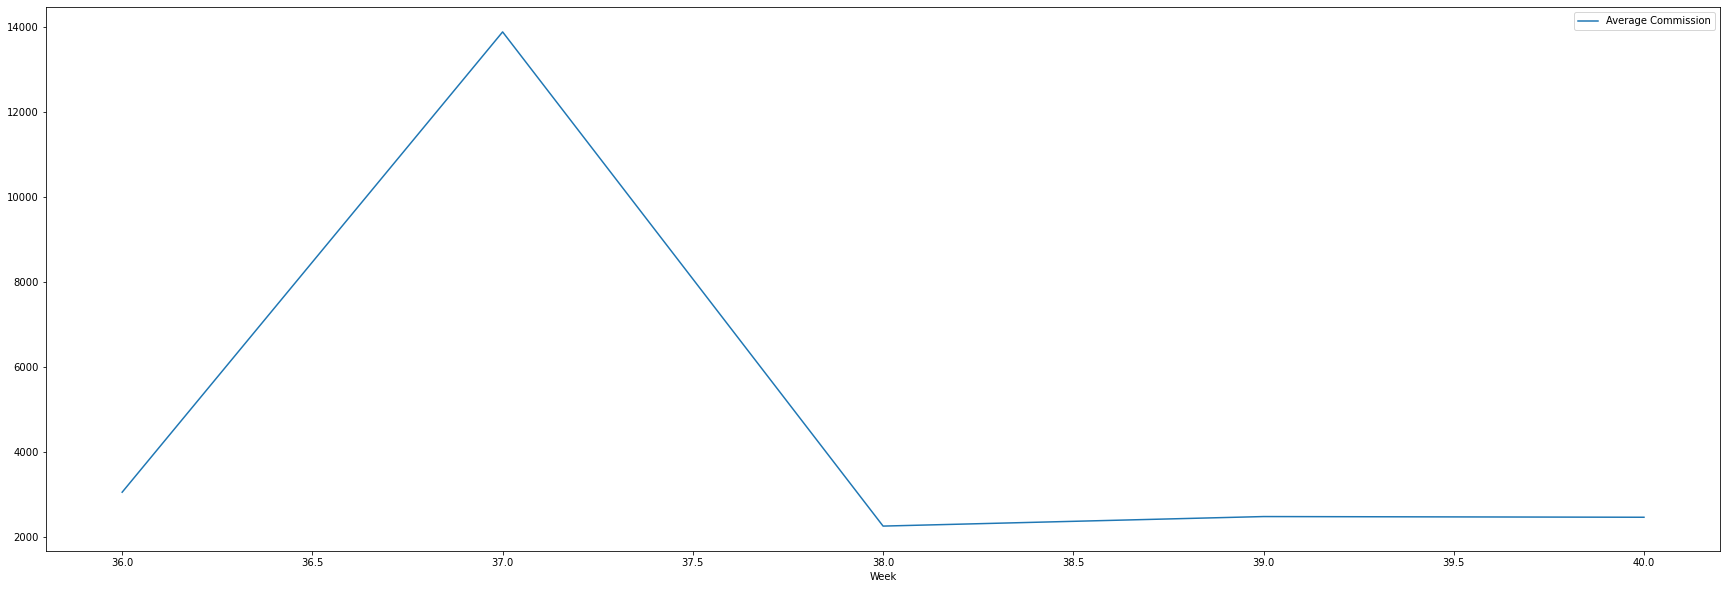

In [23]:
#getting the values for specific months
com_sep = com_mth[com_mth['Month']==9]
com_sep = com_sep.sort_values(by='Week')
com_sep = com_sep.drop(columns=['Month'])
com_sep

#getting the values for each week
wk1 = com_sep[com_sep['Week']=='1']
wk1

wk2 = com_sep[com_sep['Week']=='2']
wk2

wk3 = com_sep[com_sep['Week']=='3']
wk3 

wk4 = com_sep[com_sep['Week']=='4']
wk4

wk5 = com_sep[com_sep['Week']=='5']
wk5

d = {'Week': [36, 37, 38, 39, 40], 
     'Average Commission': [ wk1['Commision Earned'].mean(),
                             wk2['Commision Earned'].mean(),
                             wk3['Commision Earned'].mean(),
                             wk4['Commision Earned'].mean(),
                             wk5['Commision Earned'].mean()]}

sepAvgComm = pd.DataFrame(data=d)
sepAvgComm
sepAvg_graph = sepAvgComm.plot.line(x='Week', y='Average Commission', figsize=(30,10))

# THIRD QUARTER AVERAGE<a class="anchor" id="tqa"></a>

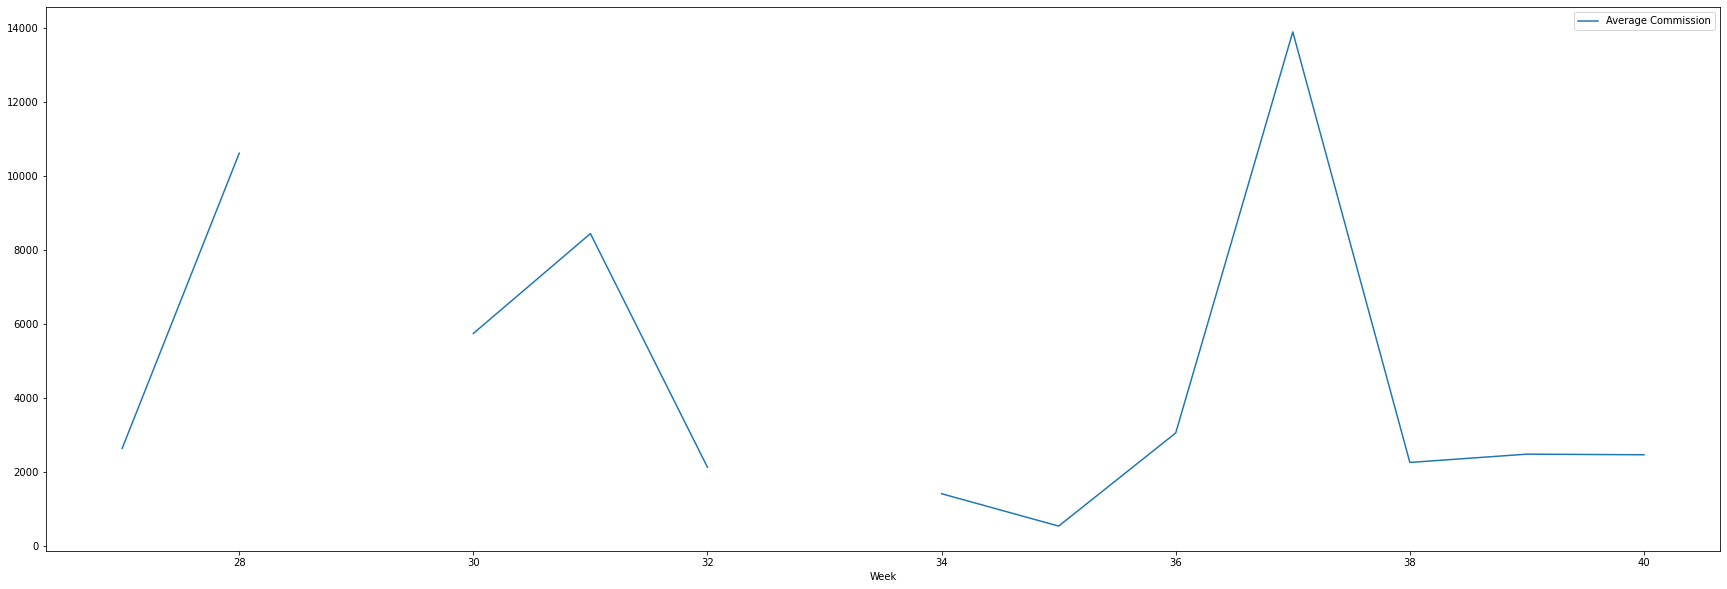

In [24]:
thirdQuarter = [julAvgComm, augAvgComm, sepAvgComm]

thirdQ = pd.concat(thirdQuarter)

thirdQgraph = thirdQ.plot.line(x='Week', y='Average Commission', figsize=(30,10))

# OCTOBER <a class="anchor" id="oct"></a>

,Week,fscName,type,Commision Earned,Total
821,1,NOBERT OGUTU,Spraying,8500.0,2.0
822,1,NOBERT OGUTU,Spraying,20500.0,2.0
820,1,JOSEPH ODWAR,Spraying,28000.0,2.0
816,1,PAUL KURIA,Spraying,1200.0,2.0
818,1,DOUGLAS KIPLETAN,Spraying,3950.0,2.0
817,1,NOAH RONO,Spraying,330.0,2.0
819,1,Robert Opar,Spraying,500.0,2.0
823,2,DOUGLAS KIPLETAN,Spraying,4160.0,2.0
824,2,PAUL KURIA,Spraying,3200.0,2.0
825,2,NOBERT OGUTU,Spraying,25000.0,2.0


,Week,fscName,type,Commision Earned,Total
821,1,NOBERT OGUTU,Spraying,8500.0,2.0
822,1,NOBERT OGUTU,Spraying,20500.0,2.0
820,1,JOSEPH ODWAR,Spraying,28000.0,2.0
816,1,PAUL KURIA,Spraying,1200.0,2.0
818,1,DOUGLAS KIPLETAN,Spraying,3950.0,2.0
817,1,NOAH RONO,Spraying,330.0,2.0
819,1,Robert Opar,Spraying,500.0,2.0


,Week,fscName,type,Commision Earned,Total
823,2,DOUGLAS KIPLETAN,Spraying,4160.0,2.0
824,2,PAUL KURIA,Spraying,3200.0,2.0
825,2,NOBERT OGUTU,Spraying,25000.0,2.0


,Week,fscName,type,Commision Earned,Total
829,3,David Onyunde,Spraying,1100.0,2.0
827,3,NOAH RONO,Spraying,2000.0,2.0
833,3,Marlone Awillie,Spraying,20500.0,2.0
830,3,SYLVESTER OWINO,Spraying,350.0,2.0
832,3,SAMUEL NYAPOLA,Spraying,700.0,2.0
831,3,LUCAS ONYANGO,Spraying,250.0,2.0
826,3,ALEX MACHARIA,Spraying,2900.0,2.0
828,3,PAUL KURIA,Spraying,2600.0,2.0


,Week,fscName,type,Commision Earned,Total
836,4,JOAN CHESEREM,Spraying,4200.0,2.0
839,4,MARTIN OLOO JUMA,Spraying,500.0,2.0
838,4,SAMSON OPIYO,Spraying,3000.0,2.0
841,4,SAMUEL NYAPOLA,Spraying,600.0,2.0
835,4,JOAN CHESEREM,Spraying,3550.0,2.0
834,4,JOAN CHESEREM,Spraying,4050.0,2.0
837,4,HANS KHANDO,Spraying,6540.0,2.0
840,4,NOAH OWUOR,Spraying,300.0,2.0


,Week,Average Commission
0,41,8997.142857
1,42,10786.666667
2,43,3800.000000
3,44,2842.500000


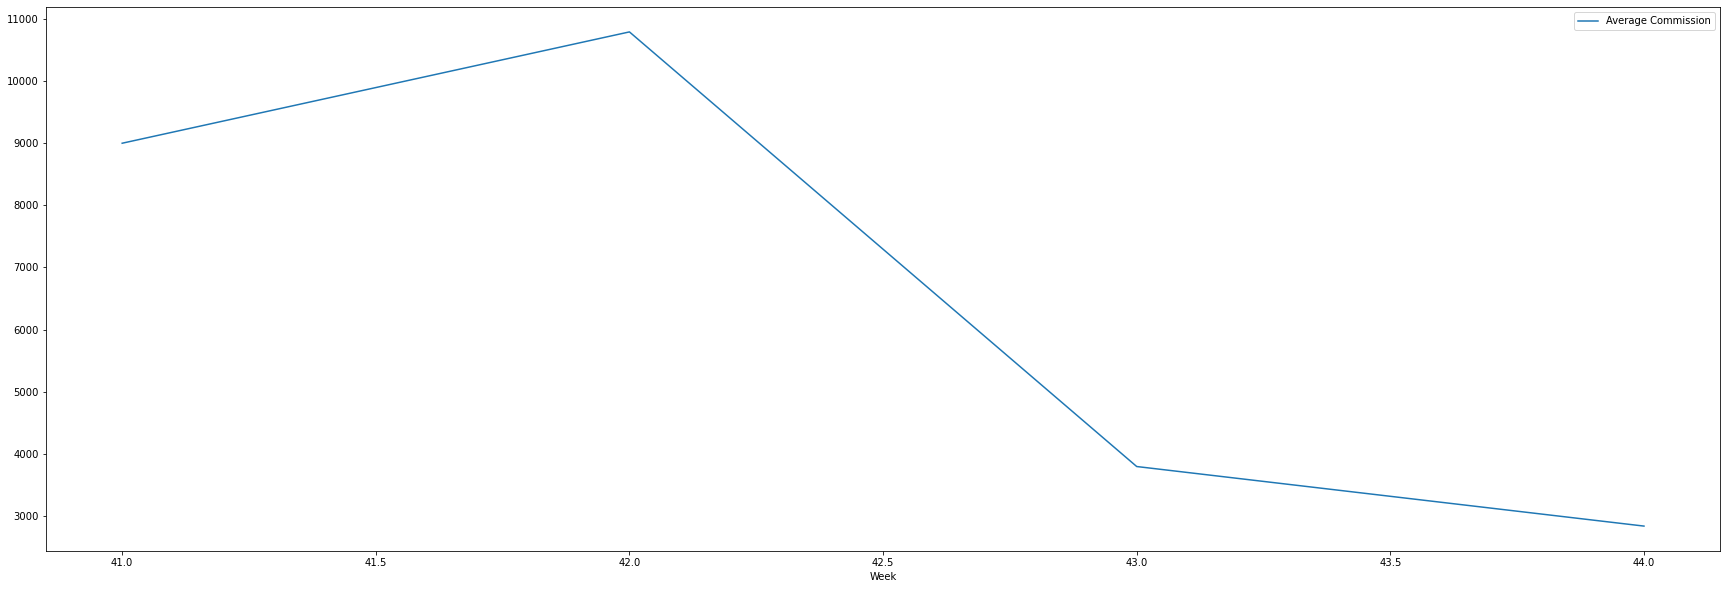

In [25]:
#getting the values for specific months
com_oct = com_mth[com_mth['Month']==10]
com_oct = com_oct.sort_values(by='Week')
com_oct = com_oct.drop(columns=['Month'])
com_oct

#getting the values for each week
wk1 = com_oct[com_oct['Week']=='1']
wk1

wk2 = com_oct[com_oct['Week']=='2']
wk2

wk3 = com_oct[com_oct['Week']=='3']
wk3 

wk4 = com_oct[com_oct['Week']=='4']
wk4


d = {'Week': [41, 42, 43, 44], 
     'Average Commission': [ wk1['Commision Earned'].mean(),
                             wk2['Commision Earned'].mean(),
                             wk3['Commision Earned'].mean(),
                             wk4['Commision Earned'].mean()]}

octAvgComm = pd.DataFrame(data=d)
octAvgComm
octAvg_graph = octAvgComm.plot.line(x='Week', y='Average Commission', figsize=(30,10))

# NOVEMBER <a class="anchor" id="nov"></a>

,Week,fscName,type,Commision Earned,Total
844,1,SAMUEL NYAPOLA,Spraying,600.0,2.0
845,1,MARTIN OLOO JUMA,Spraying,450.0,2.0
842,1,NOAH RONO,Spraying,2900.0,2.0
843,1,David Onyunde,Spraying,1200.0,2.0


,Week,fscName,type,Commision Earned,Total
844,1,SAMUEL NYAPOLA,Spraying,600.0,2.0
845,1,MARTIN OLOO JUMA,Spraying,450.0,2.0
842,1,NOAH RONO,Spraying,2900.0,2.0
843,1,David Onyunde,Spraying,1200.0,2.0


,Week,Average Commission
0,45,1287.5


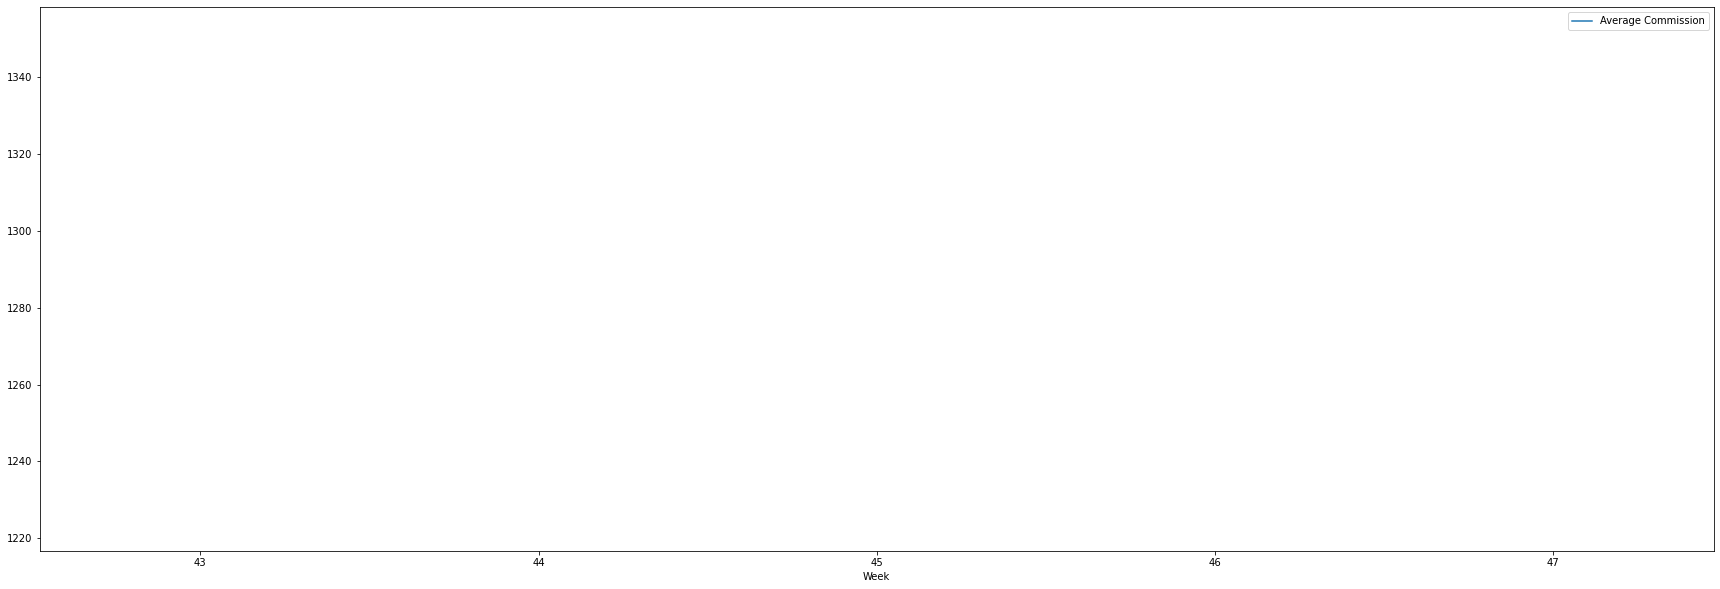

In [26]:
#getting the values for specific months
com_nov = com_mth[com_mth['Month']==11]
com_nov = com_nov.sort_values(by='Week')
com_nov = com_nov.drop(columns=['Month'])
com_nov

#getting the values for each week
wk1 = com_nov[com_nov['Week']=='1']
wk1


d = {'Week': [45], 
     'Average Commission': [ wk1['Commision Earned'].mean()]}

novAvgComm = pd.DataFrame(data=d)
novAvgComm
novAvg_graph = novAvgComm.plot.line(x='Week', y='Average Commission', figsize=(30,10))

In [27]:
# FINAL QUARTER AVERAGE<a class="anchor" id="fiqa"></a>

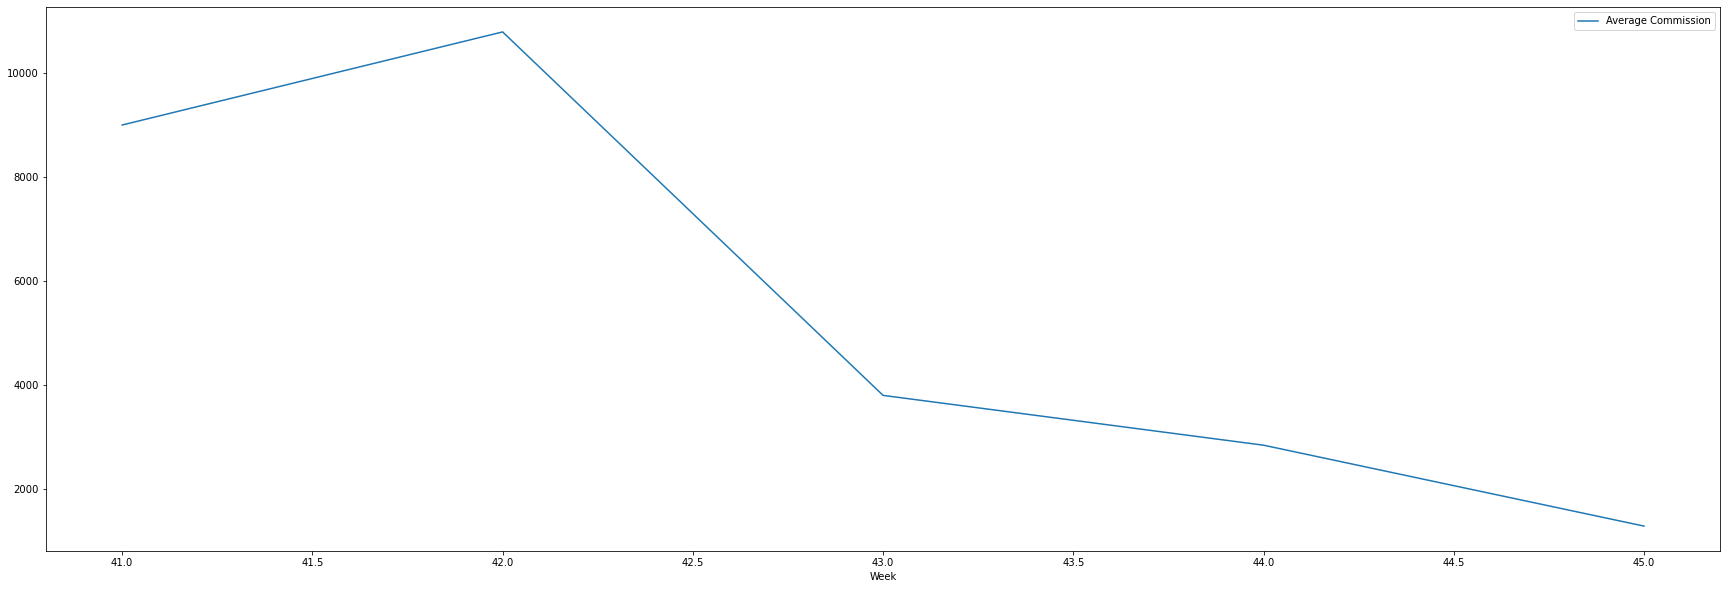

In [28]:
finQuarter = [octAvgComm, novAvgComm]

finQ = pd.concat(finQuarter)

finQgraph = finQ.plot.line(x='Week', y='Average Commission', figsize=(30,10))

# FULL YEAR AVERAGE<a class="anchor" id="fya"></a>

,Week,Average Commission
0,1,2100.000000
1,2,1925.000000
2,3,1526.923077
3,4,2212.500000
4,5,1384.210526
0,6,1640.000000
1,7,1700.000000
2,8,2111.153846
3,9,2803.472222
0,10,2671.311475


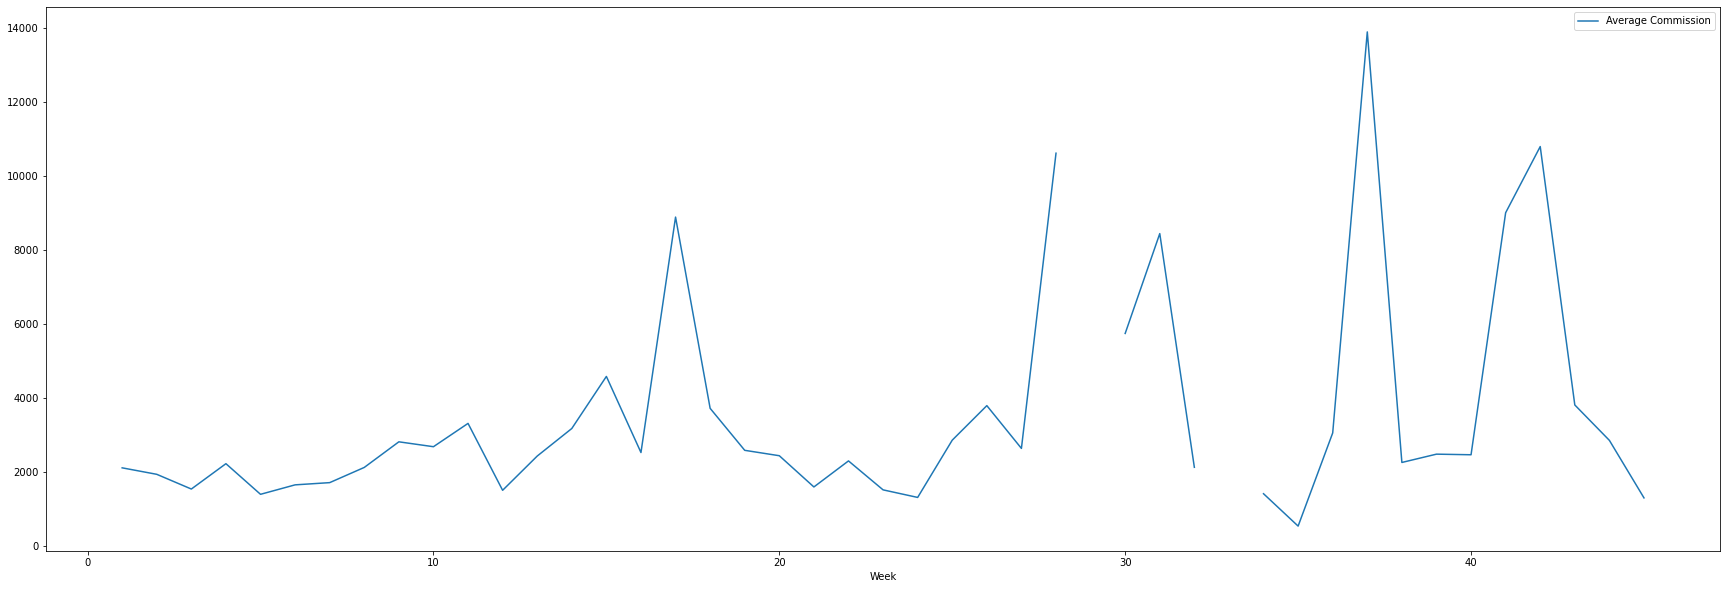

In [29]:
fya = pd.concat([janAvgComm, febAvgComm, marAvgComm, aprAvgComm, mayAvgComm, junAvgComm, julAvgComm, augAvgComm, sepAvgComm, octAvgComm, novAvgComm])
fya

fyaGraph = fya.plot.line(x='Week', y='Average Commission', figsize=(30,10))